In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import csv

consumer_key = "WvBuG7r6Jot3bKKrguMNX6Oa7"
consumer_secret = "c4BX6SqS7ul45BptocNrdrfyYcUfve5PPnSJ8FvdVlzCejEODF"
access_key = "1338519670660288514-aZGqRzLYtVSpFZts7OaQH0Yz8hHEMt"
access_secret = "E8lZ1Stxjy8A2CJrYUD0WWZcV1sfslLhubvGmMcI9Oxpo"

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    
# Set the access token and access token secret
authenticate.set_access_token(access_key, access_secret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

### Extract the data & Analyze
When using extended mode, the text attribute of Status objects returned by tweepy. API methods is replaced by a full_text attribute, which contains the entire untruncated text of the Tweet.

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world works to end the COVID-19 pandemic @PMOIndia https://t.co/Ds4f3tmrm3

2) RT @lastmilehealth: The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…

3) What does Rashida Jones have on her shopping list? That’s just one of the many questions that didn’t make it into our podcast. You can listen to some of the big questions we did tackle here: https://t.co/RJzHRUPoik https://t.co/yh63b11RSW

4) 2021 will be better than 2020. Here’s why: https://t.co/mYbpl5wwF1

5) Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Karim on receiving this honor. https://t.co/XE2NArYcE3



#### Create a DataFrame with a column called Tweets that’ll contain the posts from the Twitter user, and then show the first five rows.

In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [6]:
df.head()

,Tweets
0,It’s great to see India’s leadership in scient...
1,RT @lastmilehealth: The best emergency system ...
2,What does Rashida Jones have on her shopping l...
3,2021 will be better than 2020. Here’s why: htt...
4,Standing up for science has never been more im...


In [7]:
df.shape

(100, 1)

In [8]:
# Create a function to clean the tweets
def clean(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub(':', '', text) # Removing ':' hash tag
    
    return text

In [9]:
df['Tweets'] = df['Tweets'].apply(clean)

In [10]:
df

,Tweets
0,It’s great to see India’s leadership in scient...
1,The best emergency system is a strong primary...
2,What does Rashida Jones have on her shopping l...
3,2021 will be better than 2020. Here’s why
4,Standing up for science has never been more im...
...,...
95,"In his final words, John Lewis challenges all ..."
96,The impacts of COVID-19 are driving worrying i...
97,The ’s support of and is instrumental to th...
98,"In these challenging times, we can’t lose sigh..."


In [11]:
pd.set_option('display.max_colwidth', None)

In [12]:
df.head()

,Tweets
0,It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world works to end the COVID-19 pandemic
1,The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…
2,What does Rashida Jones have on her shopping list? That’s just one of the many questions that didn’t make it into our podcast. You can listen to some of the big questions we did tackle here
3,2021 will be better than 2020. Here’s why
4,Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Karim on receiving this honor.


In [13]:
# Create a function to get the subjectivity
def getSub(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getpol(text):
    return TextBlob(text).sentiment.polarity

In [14]:
# Create two new columns for subjectivity and Polarity
df['Subjectivity'] = df['Tweets'].apply(getSub)
df['Polarity'] = df['Tweets'].apply(getpol)

In [15]:
df

,Tweets,Subjectivity,Polarity
0,It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world works to end the COVID-19 pandemic,0.750000,0.800000
1,The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…,0.511111,0.611111
2,What does Rashida Jones have on her shopping list? That’s just one of the many questions that didn’t make it into our podcast. You can listen to some of the big questions we did tackle here,0.300000,0.250000
3,2021 will be better than 2020. Here’s why,0.500000,0.500000
4,Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Karim on receiving this honor.,0.750000,0.450000
...,...,...,...
95,"In his final words, John Lewis challenges all of us to continue to stand up for what we truly believe. “Together, you can redeem the soul of our nation.” \n\n",1.000000,0.000000
96,"The impacts of COVID-19 are driving worrying increases in malnutrition and health outcomes. However, there are clear actions that can be taken in both the near- and long-term.",0.391667,0.100000
97,The ’s support of and is instrumental to the research and development of the COVID19 vacci…,0.000000,0.000000
98,"In these challenging times, we can’t lose sight of the importance of combatting climate change. I’m excited to hear about how companies like are finding a way to play a role.",0.875000,0.437500


#### A word cloud (also known as text clouds or tag clouds) is a visualization, the more a specific word appears in the text, the bigger and bolder it appears in the word cloud.

In [16]:
# Word Cloud Visualization
allwords = ' '.join([twts for twts in df['Tweets']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allwords)

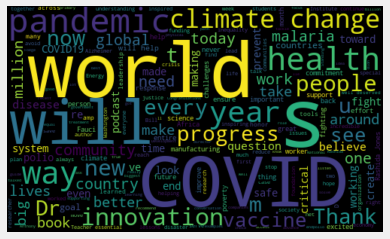

In [17]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### looks like the word “COVID” appears a lot in Bill Gates past 100 tweets.

In [18]:
def isNotNull(value):
    return value is not None and len(value)>0

In [19]:
dict_pos = []
dict_neg = []
f = open('negative-words.txt','r')
for line in f:
    t= line.strip().lower();
    if (isNotNull(t)):
        dict_neg.append(t)
f.close()

f = open('positive-words.txt','r')
for line in f:
    t = line.strip().lower();
    if (isNotNull(t)):
        dict_pos.append(t)
f.close()

In [21]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\gkhat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


True

In [27]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

def sentiment(sentence):
  senti=0
  words = [word.lower() for word in tokenizer.tokenize(sentence)]
  for word in words:
    if word in dict_pos:
      senti += 1
    elif word in dict_neg:
      senti -= 1
  return senti

In [28]:
df['sentiment']=df['Tweets'].apply(sentiment)

In [29]:
df.head()

,Tweets,Subjectivity,Polarity,sentiment
0,It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world works to end the COVID-19 pandemic,0.750000,0.800000,4
1,The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…,0.511111,0.611111,1
2,What does Rashida Jones have on her shopping list? That’s just one of the many questions that didn’t make it into our podcast. You can listen to some of the big questions we did tackle here,0.300000,0.250000,0
3,2021 will be better than 2020. Here’s why,0.500000,0.500000,1
4,Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Karim on receiving this honor.,0.750000,0.450000,2


In [31]:
df.sentiment.unique()

array([ 4,  1,  0,  2,  3, -2, -3, -1,  5,  6], dtype=int64)

In [36]:
df.loc[df['Polarity']>=0.5]

,Tweets,Subjectivity,Polarity,sentiment
0,It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world works to end the COVID-19 pandemic,0.750000,0.800000,4
1,The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…,0.511111,0.611111,1
3,2021 will be better than 2020. Here’s why,0.500000,0.500000,1
6,This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these times. provides a brilliant and gripping account of another era of widespread anxiety the years 1940 and 1941.,0.966667,0.600000,0
10,The season finale of our podcast features two incredible people who are using their positions as artists to change the world for the better.,0.700000,0.700000,2
12,"Thanks for the great conversation, Carlos.",0.475000,0.500000,1
15,Here are five books that I’d recommend as we wrap up 2020. I hope you find something that helps you—or the book lover in your life—finish the year on a good note.,0.600000,0.700000,3
23,I’m inspired by Quarraisha Abdool Karim and . They are two of the most respected HIV/AIDS researchers in the world. And now they are helping guide the COVID-19 response in South Africa and around the globe. WorldAIDSDay,0.500000,0.500000,1
24,My parents taught me to leave the world better than I found it. \n\nSo many people across the country believe in giving bac…,0.500000,0.500000,1
30,You can listen to a bonus clip that didn’t make it into our latest episode here,0.900000,0.500000,1
